# 0.- Importamos librerías

Aunque en `py` lo más eficiente es importar las librerías según se utilicen, por motivos de legibilidad y orden, paso a importarlos al principio del presente `notebook`


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 10.3 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 75.3 MB/s eta 0:00:01
     |████████████████████████████████| 23.8 MB 39.6 MB/s eta 0:00:01     |███████████████████████         | 17.1 MB 39.6 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 50.9 MB/s eta 0:00:01
     |████████████████████████████████| 176.2 MB 24 kB/s  eta 0:00:011     |████████████████████████████▋   | 157.8 MB 313 kB/s eta 0:00:59
     |████████████████████████████████| 491 kB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 45.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 28.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 43.9 MB/s eta 0:00:01
  Using cached pandas-2.2.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
     |████████████████████████████████| 13.0 MB 36.5 MB/s eta 0:00:01
 

In [3]:
import pandas as pd

#import from pandas import read_csv
#from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import scipy 
from scipy.stats import skew, boxcox_normmax, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import bayes_opt
from bayes_opt import BayesianOptimization


import h2o

/home/cmoragoncorella/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
print ('Versiones de las principales librerías utilizadas en este Notebook')
print ('Versión de pandas: {}'.format(pd.__version__))
print ('Versión de H20: {}'.format(h2o.__version__))
print ('Versión de sklearn: {}'.format(sklearn.__version__))
print ('Versión de numpy: {}'.format(np.__version__))
print ('Versión de scipy: {}'.format(scipy.__version__))


Versiones de las principales librerías utilizadas en este Notebook
Versión de pandas: 2.2.1
Versión de H20: 3.36.0.3
Versión de sklearn: 0.24.2
Versión de numpy: 1.26.4
Versión de scipy: 1.7.0


# 1.- Análisis y preprocesamiento del dataset Iris

## 1.1 Carga del dataset

Cargamos el dataset de sklearn, lo transformamos a `pd.DataFrame` y renombramos las columnas

In [5]:
from sklearn import datasets
iris  = datasets.load_iris()

In [6]:
type(iris)

sklearn.utils.Bunch

In [7]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [8]:
iris_df.columns = ['sepal_l','sepal_w','petal_l','petal_w','target']

In [9]:
iris_df.head()

/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## 1.2 Descriptivos sobre el dataset

### 1.2.1 Tipos y métricas


In [10]:
iris_df.shape

(150, 5)

In [11]:
iris_df.describe()

/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,sepal_l,sepal_w,petal_l,petal_w,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Se puede observar que la distribución de las variables en términos de centralidad (media / mediana) y dispersión no es igual en todas las variables.  Confirmaremos este extremo analizando el sesgo en la distribución y cuando mostremos los diagramas de las variables. Seguidamente, necesitamos más información sobre la tipología de las variables (a priori parecen todas numéricas, número de valores nulos y distintos, etc)

### Análisis del sesgo

Confirmamos que no parece existir un sesgo demasiado alto, por lo que no será necesario tratarlo a la hora de trabajar sobre los datos (todos los valores son menores a `abs(0.5)`

In [12]:
feature_skew = iris_df.apply(
            lambda x: skew(x)).sort_values(ascending=False)

In [13]:
feature_skew

sepal_w    0.315767
sepal_l    0.311753
target     0.000000
petal_w   -0.101934
petal_l   -0.272128
dtype: float64

###  Confirmamos los tipos y los NA's

Son todos de tipo float y no presentan NA's

In [14]:
iris_df.dtypes

sepal_l    float64
sepal_w    float64
petal_l    float64
petal_w    float64
target     float64
dtype: object

In [15]:
meta = dict()

descr_tipos = pd.DataFrame({'dtype': iris_df.dtypes,
                      'NAs': iris_df.isna().sum()})
descr_tipos.head()

/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,dtype,NAs
sepal_l,float64,0
sepal_w,float64,0
petal_l,float64,0
petal_w,float64,0
target,float64,0


### Número de registros únicos

Parece que hay un duplicado en el dataset

In [16]:
conteos = pd.DataFrame({'regs': iris_df.shape[0],
                      'regs_unicos': iris_df.drop_duplicates().count()})

conteos

/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,regs,regs_unicos
sepal_l,150,149
sepal_w,150,149
petal_l,150,149
petal_w,150,149
target,150,149


In [17]:
iris_df[iris_df.duplicated()]

/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,sepal_l,sepal_w,petal_l,petal_w,target
142,5.8,2.7,5.1,1.9,2.0


### Análisis de presencia de outliers

Aunque podríamos utilizar métodos más avanzados como `IsolationForest` o `LocalOutliersFactor`, como estamos trabajando con un dataset sencillo, simplemente me basaré en la distancia interquantil `IQR`

In [18]:
q1 = iris_df.quantile(0.25)
q3 = iris_df.quantile(0.75)
iqr = q3 - q1
q1

sepal_l    5.1
sepal_w    2.8
petal_l    1.6
petal_w    0.3
target     0.0
Name: 0.25, dtype: float64

 ---------------------------------------------------------------------------------------
 Como la distribución no está demasiado sesgada, pondré 3 como factor para determinar si es outlier o no
 
 ---------------------------------------------------------------------------------------


In [19]:
(((iris_df < (q1 - 3 * iqr))) |((iris_df > (q3 + 3 * iqr)))).sum()

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
target     0
dtype: int64

### Número de registros por target

No existe desbalanceo en la target

In [20]:
iris_df.groupby('target').size().reset_index(name='conteos')

/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,target,conteos
0,0.0,50
1,1.0,50
2,2.0,50


### 1.2.2 Diagramas Univariantes

Como se puede ver en los diagramas, tal y como hemos visto no existe demasiado sesgo en la distribución. 

Aunque parece que en `sepal_w` aparecen datos extremos, como no hemos identificado outliers no los trataremos.


In [21]:
iris_df.iloc[:,:-1].hist(grid=False,
       figsize=(10, 6),
       bins=30)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1364/3878141633.py", line 1, in <module>
    iris_df.iloc[:,:-1].hist(grid=False,
  File "/home/cmoragoncorella/.local/lib/python3.9/site-packages/pandas/plotting/_core.py", line 250, in hist_frame
    with a line at the median (Q2). The whiskers extend from the edges
  File "/home/cmoragoncorella/.local/lib/python3.9/site-packages/pandas/plotting/_core.py", line 1944, in _get_plot_backend
  File "/home/cmoragoncorella/.local/lib/python3.9/site-packages/pandas/plotting/_core.py", line 1874, in _load_backend
ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/inter

In [23]:
import warnings
warnings.filterwarnings("ignore")
for col in iris_df.iloc[:,:-1].columns:
    print ('\n\n***************************************************'+col+'***************************************************\n\n')
    pyplot.figure(figsize=(16,8))
    pyplot.subplot(2,2,1)
    sns.distplot(iris_df.loc[:,col])
    pyplot.subplot(2,2,2)
    sns.boxplot(iris_df.loc[:,col])
    pyplot.subplot(2,2,3)
    sns.distplot(iris_df.loc[:,col])
    pyplot.subplot(2,2,4)
    sns.boxplot(iris_df.loc[:,col])
    pyplot.show()



***************************************************sepal_l***************************************************




NameError: name 'pyplot' is not defined

### 1.2.3 Diagramas multivariantes

#### Respecto a otras predictoras

Más allá de la distribución de los datos respecto a la target (por ejemplo, los individuos pertenecientes a la clase 0 tienen valores de petalo pequeño pero el ancho de sépalo es alto), conviene pararse a analizar:

1. Que los individuos de la target 0 pueden discriminarse más fácilmente que los individuso de la clase 1 y 2. 
2. Las variables petal length y width están altamente correladas


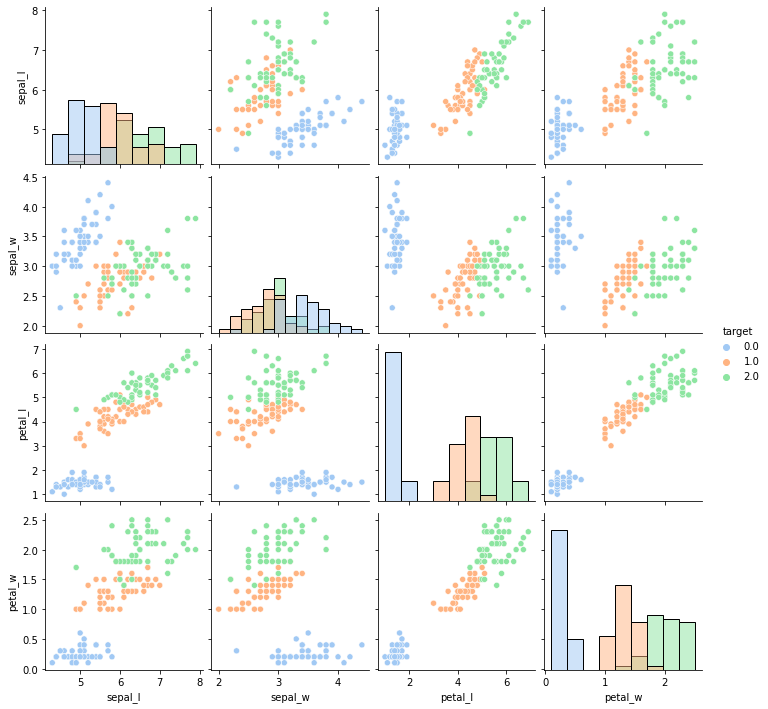

In [ ]:

sns.pairplot(iris_df, hue="target", diag_kind="hist", palette='pastel')

 ---------------------------------------------------------------------------------------

Si se quisiese ahondar en el análisis de las los valores que toman cada una de variables predictoras respecto de la target, podríamos analizar lo siguiente

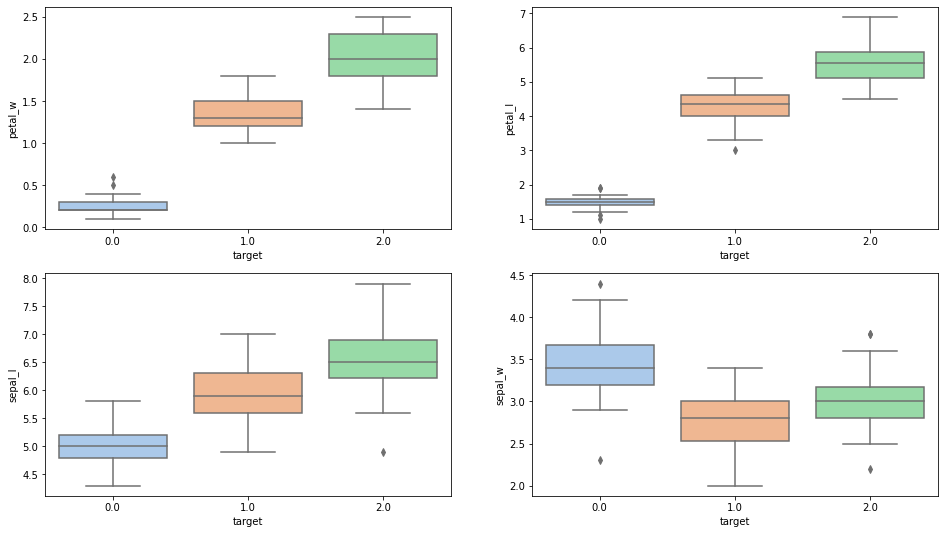

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_w", x= "target", data=iris_df,  orient='v' , ax=axes[0, 0],palette='pastel')
sns.boxplot(  y="petal_l", x= "target", data=iris_df,  orient='v' , ax=axes[0, 1],palette='pastel')
sns.boxplot(  y="sepal_l", x= "target", data=iris_df,  orient='v' , ax=axes[1, 0],palette='pastel')
sns.boxplot(  y="sepal_w", x= "target", data=iris_df,  orient='v' , ax=axes[1, 1],palette='pastel')
plt.show()

 ---------------------------------------------------------------------------------------

#### Correlaciones
Si bien este punto podría haberse hecho de forma numérica, al ser pocas variables, mostrar una matriz de correlación es una forma rápida de visualizar la existencia o no de este fenómeno en los datos. Podemos comprobar que los valores más altos de correlación los obtenemos con las variables `petal_w` y `petal_l`, como ya vimos.  `sepal_l` y `sepal_w` son las variables que menos correladas están. No obstante lo anterior, tendremos que tratar la correlación de variables de cara a realizar modelos como los basados en regresión.

In [25]:
corr = iris_df.iloc[:,:-1].corr()

In [ ]:
corr

,sepal_l,sepal_w,petal_l,petal_w
sepal_l,1.000000,-0.117570,0.871754,0.817941
sepal_w,-0.117570,1.000000,-0.428440,-0.366126
petal_l,0.871754,-0.428440,1.000000,0.962865
petal_w,0.817941,-0.366126,0.962865,1.000000


[Text(0.5, 0, 'sepal_l'),
 Text(1.5, 0, 'sepal_w'),
 Text(2.5, 0, 'petal_l'),
 Text(3.5, 0, 'petal_w')]

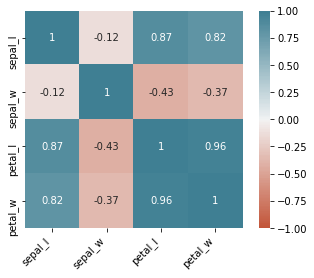

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

# 2. Entrenamiento

## 2.1 Selección del modelo

Al ser un dataset bastante simple, no voy a utilizar stacking, bagging (RandomForest ) o boosting (XGBoost), ni tampoco basados en redes de neuronas (como el perceptron multicapa, que en datasets pequeños no ofrece una mejora significativa). No existen modelos idóneos para cualquier dataset, por tanto, y aunque idealmente habría que probar varios, a modo de ejercicio probaré simplemente un modelo de regresión con distribución multinomial.

## 2.2 Preprocesamiento



### 2.2.1.- Eliminación de variables altamente correladas y eliminación de variables correladas: 

Como entre los modelos que voy a utilizar a utilizar una regresión logística de distribución multivariante, escalo los datos y elimino variables correladas para evitar inestabilidad y sesgos en el modelo.
Esto no es estrictamente necesario si utilizase otros modelos, como Gradient Boosting o un Random Forest. No obstante, no es una mala práctica realizarlo.

Como la distribución de las variables no sigue una normal aplicaré una normalización basada en máximo y mínimo



In [27]:
# Poongo en valores absolutos los valores de correlación obtenidos con anterioridad
corr_matrix = corr.abs()

# Me quedo con los valores del triángulo superior de la matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Selecciono aquellas variables que tienen una correlación superior a 0.9 en términos absolutos
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]


In [28]:
to_drop

['petal_w']

In [29]:
df = iris_df.drop(to_drop,axis=1)
del iris_df

In [30]:
df.head()

,sepal_l,sepal_w,petal_l,target
0,5.1,3.5,1.4,0.0
1,4.9,3.0,1.4,0.0
2,4.7,3.2,1.3,0.0
3,4.6,3.1,1.5,0.0
4,5.0,3.6,1.4,0.0


### 2.2.2.- Eliminamos duplicados

In [31]:
df = df.drop_duplicates()
df.shape

(144, 4)

### 2.2.3.-  Escalado

In [32]:
scaler = MinMaxScaler()

In [33]:
X = df[['sepal_l','sepal_w','petal_l']]

In [34]:
X.head()

,sepal_l,sepal_w,petal_l
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [35]:
y = df[['target']].astype(int)
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [36]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns =['sepal_l','sepal_w','petal_l'] )

In [37]:
X.head()

,sepal_l,sepal_w,petal_l
0,0.222222,0.625000,0.067797
1,0.166667,0.416667,0.067797
2,0.111111,0.500000,0.050847
3,0.083333,0.458333,0.084746
4,0.194444,0.666667,0.067797


In [38]:
df_final = X
df_final['target'] = y.iloc[:,0].values

In [39]:
del df

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Cargamos los datos del conjunto de datos IRIS
iris = load_iris()

# Creamos un DataFrame a partir de los datos y las características
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

# Subconjunto de datos
sub_iris_df = iris_df.sample(n=50, random_state=42)  # Por ejemplo, seleccionamos aleatoriamente 50 filas

# Exportar el subconjunto a CSV
sub_iris_df.to_csv('subconjunto_iris.csv', index=False)

# Verificar que se ha exportado correctamente
print("Subconjunto de IRIS exportado a subconjunto_iris.csv")

Subconjunto de IRIS exportado a subconjunto_iris.csv


## 3. Modelado

Aunque `sklearn` es un framework muy utilizado a la hora de realizar modelos de aprendizaje automático, voy a utilizar `h2o` para el modelado. `H2o` permite realizar los entrenamientos de forma muy rápida, abstrayéndonos de detalles en el preprocesado que facilitan el desarrollo rápido de modelos. Asimismo, permite almacenar los objetos en formato `mojo` de forma que pueden ser utilizados por el mismo framework en otro lenguaje (como 'R') sin necesidad de tener que reentrenar los modelos, o meter todas las variables de tu dataset sin necesidad de eliminarlas de forma que él se quede únicamente con las variables significativas del modelo

In [40]:

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.10" 2024-01-16; OpenJDK Runtime Environment (build 17.0.10+7-Debian-1deb11u1); OpenJDK 64-Bit Server VM (build 17.0.10+7-Debian-1deb11u1, mixed mode, sharing)
  Starting server from /home/cmoragoncorella/.local/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdra9njua
  JVM stdout: /tmp/tmpdra9njua/h2o_cmoragoncorella_started_from_python.out
  JVM stderr: /tmp/tmpdra9njua/h2o_cmoragoncorella_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,"2 years, 1 month and 24 days !!!"
H2O_cluster_name:,H2O_from_python_cmoragoncorella_787c84
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.908 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [41]:
h2oframe = h2o.H2OFrame(df_final)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [42]:
h2oframe.head()

sepal_l,sepal_w,petal_l,target
0.222222,0.625,0.0677966,0
0.166667,0.416667,0.0677966,0
0.111111,0.5,0.0508475,0
0.0833333,0.458333,0.0847458,0
0.194444,0.666667,0.0677966,0
0.305556,0.791667,0.118644,0
0.0833333,0.583333,0.0677966,0
0.194444,0.583333,0.0847458,0
0.0277778,0.375,0.0677966,0
0.166667,0.458333,0.0847458,0


## 3.1 Partición de train, test y validación

In [43]:
h2oframe['target'] = h2oframe['target'].asfactor()

In [44]:
train_df, test_df,val_df = h2oframe.split_frame(
                                ratios=[0.75,0.15],
                                destination_frames=['train_df','test_df','val_df'] ,
                                seed=566) 

In [45]:
train_df.head()

sepal_l,sepal_w,petal_l,target
0.222222,0.625,0.0677966,0
0.166667,0.416667,0.0677966,0
0.0833333,0.458333,0.0847458,0
0.194444,0.666667,0.0677966,0
0.0833333,0.583333,0.0677966,0
0.0277778,0.375,0.0677966,0
0.166667,0.458333,0.0847458,0
0.305556,0.708333,0.0847458,0
0.138889,0.583333,0.101695,0
0.138889,0.416667,0.0677966,0


In [46]:
## Nos quedamos con los nombres, los vamos a necesitar luego

x = h2oframe.columns
y = "target"
x.remove(y)

In [47]:
x

['sepal_l', 'sepal_w', 'petal_l']

In [48]:
y

'target'

## 3.2 Búsqueda de hiperparámetros

 Si bien para modelos más complejos se puede plantear una búsqueda de hiperparámetros basados en optimización bayesiana, vamos a realizar la búsqueda usando un Grid Search por la simplicidad del modelo.
 

### Regresión

Vamos a realizar una regresión en la que buscaremos los valores óptimos para la regularización, y además utilizaremos validación cruzada para evaluar el modelo sobre 10 particiones del dataset, lo que nos permite verificar si existe sobreajuste o no en el modelo. Según el resultado que se obtiene, el modelo que mehor ha funcionado es el modelo que aplica una regularización mixta de alpha 1 y lambda 0.01, (podría considerarse como una regularización Lasso). 

In [52]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.glm import H2OGeneralizedLinearEstimator


In [53]:
hyper_parameters = {'alpha': [0,0.01,0.25,0.5,1], 'lambda': [0,0.01,0.05,0.1,0.25,0.5,1]}

gs = H2OGridSearch(H2OGeneralizedLinearEstimator(family='multinomial'),
                    hyper_parameters)
gs.train(x=x, y=y, training_frame=train_df, validation_frame = test_df,stopping_metric="misclassification",stopping_rounds=3,seed=123, nfolds=10)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      alpha  lambda                                                model_ids  \
0      1.00    0.01  Grid_GLM_train_df_model_python_1712732595960_1_model_10   
1      0.50    0.01   Grid_GLM_train_df_model_python_1712732595960_1_model_9   
2      0.25    0.01   Grid_GLM_train_df_model_python_1712732595960_1_model_8   
3      0.00    0.01   Grid_GLM_train_df_model_python_1712732595960_1_model_6   
4      0.01    0.01   Grid_GLM_train_df_model_python_1712732595960_1_model_7   
5      1.00    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_15   
6      0.00    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_11   
7      0.01    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_12   
8      0.25    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_13   
9      0.50    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_14   
10     0.01    0.00   Gri

In [54]:
gs

      alpha  lambda                                                model_ids  \
0      1.00    0.01  Grid_GLM_train_df_model_python_1712732595960_1_model_10   
1      0.50    0.01   Grid_GLM_train_df_model_python_1712732595960_1_model_9   
2      0.25    0.01   Grid_GLM_train_df_model_python_1712732595960_1_model_8   
3      0.00    0.01   Grid_GLM_train_df_model_python_1712732595960_1_model_6   
4      0.01    0.01   Grid_GLM_train_df_model_python_1712732595960_1_model_7   
5      1.00    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_15   
6      0.00    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_11   
7      0.01    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_12   
8      0.25    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_13   
9      0.50    0.05  Grid_GLM_train_df_model_python_1712732595960_1_model_14   
10     0.01    0.00   Grid_GLM_train_df_model_python_1712732595960_1_model_2   
11     0.25    0.00   Grid_GLM_train_df_

In [55]:
model = gs[0]

## Descripción del modelo
H2o proporciona información detallada sobre el rendimiento del modelo  con diferentes métricas, sobre cada una de las particiones de validación durante la validación cruzada, en el momento del entrenamiento. Seguidamente se detallan las obtenidas.

In [56]:
model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_train_df_model_python_1712732595960_1_model_10


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,multinomial,multinomial,Lasso (lambda = 0.01 ),12,4,50,train_df




ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.02832885655540655
RMSE: 0.16831178376871464

ModelMetricsMultinomialGLM: glm
** Reported on validation data. **

MSE: 0.08910813154411004
RMSE: 0.2985098516701083

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.03585180222352597
RMSE: 0.18934572142915185

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.950711,0.089330,1.000000,0.941176,1.000000,0.928571,1.000000,0.714286,1.000000,1.000000,0.923077,1.000000
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,err,0.049289,0.089330,0.000000,0.058824,0.000000,0.071429,0.000000,0.285714,0.000000,0.000000,0.076923,0.000000
3,err_count,0.500000,0.707107,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
4,logloss,0.164335,0.114450,0.084094,0.179682,0.037416,0.131150,0.299720,0.408220,0.083209,0.071590,0.194400,0.153873
5,max_per_class_error,0.116667,0.172133,0.000000,0.250000,0.000000,0.250000,0.000000,0.500000,0.000000,0.000000,0.166667,0.000000
6,mean_per_class_accuracy,0.961111,0.057378,1.000000,0.916667,1.000000,0.916667,1.000000,0.833333,1.000000,1.000000,0.944444,1.000000
7,mean_per_class_error,0.038889,0.057378,0.000000,0.083333,0.000000,0.083333,0.000000,0.166667,0.000000,0.000000,0.055556,0.000000
8,mse,0.042750,0.041185,0.012498,0.044120,0.001944,0.036579,0.084514,0.138761,0.016396,0.015138,0.048635,0.028910
9,null_deviance,25.525112,9.550964,23.010601,37.553080,22.314137,30.915623,8.981669,15.896752,32.629314,37.266502,29.102386,17.581062



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_r2,validation_classification_error,validation_auc,validation_pr_auc
0,,2024-04-10 07:04:25,0.000 sec,0,124.080963,1.098062,,,,,,,,,,,,
1,,2024-04-10 07:04:25,0.002 sec,1,45.797954,0.456163,,,,,,,,,,,,
2,,2024-04-10 07:04:25,0.004 sec,2,27.215882,0.327090,,,,,,,,,,,,
3,,2024-04-10 07:04:25,0.005 sec,3,18.865353,0.281015,,,,,,,,,,,,
4,,2024-04-10 07:04:25,0.007 sec,4,15.907656,0.268329,,,,,,,,,,,,
5,,2024-04-10 07:04:25,0.009 sec,5,15.179440,0.262567,,,,,,,,,,,,
6,,2024-04-10 07:04:25,0.011 sec,6,14.699704,0.259045,,,,,,,,,,,,
7,,2024-04-10 07:04:25,0.013 sec,7,14.506671,0.258489,,,,,,,,,,,,
8,,2024-04-10 07:04:25,0.014 sec,8,14.286725,0.258179,,,,,,,,,,,,
9,,2024-04-10 07:04:25,0.016 sec,9,14.213549,0.257999,,,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal_l,12.178642,1.000000,0.895951
1,sepal_w,0.965970,0.079317,0.071064
2,sepal_l,0.448364,0.036816,0.032985


## Principales métricas del modelo

In [57]:
performance = pd.DataFrame({'error': float(3/113),
                      'error_medio_por_clase': model.mean_per_class_error(),
                        'MSE': model.mse()},index=[0])
performance

,error,error_medio_por_clase,MSE
0,0.026549,0.027066,0.028329


## Análisis de la matriz de confusión sobre train y test

In [58]:
model.confusion_matrix(train_df)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,38.0,0.0,0.0,0.000000,0 / 38
1,0.0,38.0,1.0,0.025641,1 / 39
2,0.0,2.0,34.0,0.055556,2 / 36
3,38.0,40.0,35.0,0.026549,3 / 113


In [59]:
model.confusion_matrix(test_df)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,6.0,0.0,0.0,0.000000,0 / 6
1,0.0,7.0,1.0,0.125000,1 / 8
2,0.0,2.0,7.0,0.222222,2 / 9
3,6.0,9.0,8.0,0.130435,3 / 23


Como expusimos con anterioridad, la **clase 0 era fácilmente discriminable**, produciéndose los errores en las clases 1 y 2. Por este motivo, *el error medio por clase es menor a la tasa de error del modelo*

### Guardamos el modelo

In [60]:
model.save_mojo('./regresion')

'/home/cmoragoncorella/practica_composer/regresion/Grid_GLM_train_df_model_python_1712732595960_1_model_10.zip'

## Cargamos el modelo y evaluamos con el frame de validación

In [61]:
modelo = h2o.upload_mojo('/home/jupyter/pocs/pocs-op/data/regresion/Grid_GLM_train_df_model_python_1639753920647_18_model_10.zip')

H2OValueError: File /home/jupyter/pocs/pocs-op/data/regresion/Grid_GLM_train_df_model_python_1639753920647_18_model_10.zip does not exist

### Analizamos los datos en validación.


Como se puede comprobar, hemos clasificado correctamente todos las instancias de los datos de validación. Esto no es significativo, al haber trabajado con muy pocos datos. No obstante los errores obtenidos en la validación cruzada y en test, hacen pensar que el modelo puede estar generalizando bien.

In [ ]:
model.confusion_matrix(val_df)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,3.0,0.0,0.0,0.0,0 / 3
1,0.0,3.0,0.0,0.0,0 / 3
2,0.0,0.0,2.0,0.0,0 / 2
3,3.0,3.0,2.0,0.0,0 / 8


 ====================================== **EOF** =====================================